In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor # model który zawiera szereg warunków
from sklearn.metrics import mean_absolute_error # w jaki spoób mierzymy sukces, czyli funkcja sprawdzjąca czy posuwamy sie do przodu czy stoimy w miejscu
from sklearn.model_selection import cross_val_score

In [3]:
cd /content/drive/My\ Drive/Colab Notebooks/Matrix_DW

/content/drive/My Drive/Colab Notebooks/Matrix_DW


In [4]:
ls data

shoes_prices.csv


In [0]:
df = pd.read_csv('data/shoes_prices.csv', low_memory=False)

In [9]:
df.shape

(19387, 48)

In [0]:
df_usd = df[df.prices_currency == 'USD'].copy()

In [12]:
df_usd.shape

(18524, 48)

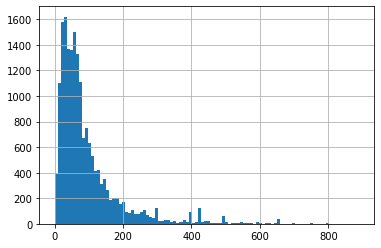

In [33]:
df_usd['prices_amountmin'] = df_usd.prices_amountmin.astype(np.float)
max_price_filter = np.percentile(df_usd['prices_amountmin'], 99)
max_price_filter
df_usd_filter = df_usd[df_usd['prices_amountmin'] < max_price_filter]
df_usd_filter.prices_amountmin.hist(bins=100)

In [35]:
ls

data/  HelloGithub.ipynb  LICENSE  matrix_one/  README.md


In [0]:
df_usd_filter.to_csv('data/valid_men_shoes.csv', index=False)

In [49]:
ls data/

men_shoes.csv  shoes_prices.csv  valid_men_shoes.csv


In [51]:
df = pd.read_csv('data/valid_men_shoes.csv', low_memory=False)
df.shape

(18280, 48)

In [96]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight', 'brand_category'],
      dtype='object')

In [52]:
mean_price = np.mean(df['prices_amountmin'])
mean_price

93.53952188183217

In [53]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

63.968341227870624

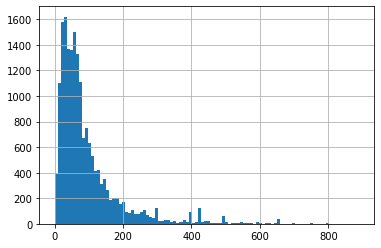

In [54]:
df['prices_amountmin'].hist(bins=100)

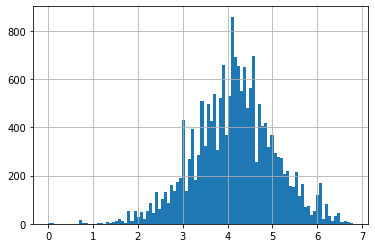

In [61]:
np.log(df['prices_amountmin']+1).hist(bins=100)  #dodajemy jedynke bo wynika to z wlasciwosci logarytmow - log(0) daje minus nieskonczoność a dopiero log(1) daje nam zero
# np.log1p(<value>) -> działa taks samo jak np.log(<value> +1)

In [67]:
y_true = df['prices_amountmin']
median_value = np.median(y_true) # mediana mowi nam ze 50% butow kosztuje 64.95 USD(wynik mediany) lub mniej. Dzieki temu czesciej trafiamy w wiekszośćprzypadków (odcinamy sie od pewnych skrajnych danych)
# median_value
y_pred = [median_value] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

58.01120240700219

In [71]:
y_true = df['prices_amountmin']
# np.mean(np.log1p(y_true)) -> 4.157759197235119
price_log_mean = np.expm1(np.mean(np.log1p(y_true))) # 62.92811169273113
y_pred = [price_log_mean] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

58.03539547661041

In [90]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight', 'brand_category'],
      dtype='object')

In [91]:
df.brand.value_counts() # zlicza ilości poszczegolnych marek
# ML potrzebuje liczb i nie mozemy mu przekazac takich danych jak poniżej np.NIKE. W tym celu musimy przypisac 
# poszcegolnym brandom jakies id.
#Mozna to zrobic ręcznie {'NIKE': 1, ...} ale mamy do tego gotowa funkcje:
df.brand.factorize() # pierwsza lista to id a druga przypisane wartości (klucz->wartosc). id jest przypisane w sposob spojny

(array([  0,   0,   1, ..., 411, 411, 411]),
 Index(['Josmo', 'SERVUS BY HONEYWELL', 'NATIVE', 'MAUI AND SONS', 'Twisted X',
        'Lacoste', 'Rubies', 'unbranded', 'PUMA', 'Filament',
        ...
        'Bindi', 'Holloway Sportswear', 'River City', 'AH by Android Homme',
        'SEG', 'American Rag', 'BININBOX', 'HEAD', 'Swix', 'Xray, XRay'],
       dtype='object', length=1856))

In [0]:
# tworzymy nowa kolumne 'brand_category' ktora jest id'kami dla brandow 
# NIKE to brand a np. 0 to brand_category
df['brand_category'] = df.brand.factorize()[0] # array([  0,   0,   1, ..., 411, 411, 411])

In [0]:
#tutaj nowo utworzona kolumne przypisujemy do zmiennej i wyciagamy wartosci z tej kolumny, czyli nasze powyższe id'ki
feats = ['brand_category']
X = df[feats].values # wazne jest DUZE X
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

In [94]:
# stad bierzemy zmienna scoring
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [95]:
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
# array([-57.89947522, -57.73227208, -52.50719535, -58.06843816, -65.72540391])
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [97]:
# zapisanie powyższych wyliczen dla nowej kolumny do funkcji
def run_model(feats):
  X = df[feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)
  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

run_model(['brand_category'])

(-58.38655694633361, 4.223555478221712)

In [0]:
df['name_category'] = df.name.factorize()[0]

In [128]:
run_model(['name_category'])

(-62.80860350146927, 3.7143153110241443)

In [129]:
run_model(['brand_category', 'name_category'])

(-62.19545771749637, 3.097006027345663)

In [0]:
ls

day3.ipynb  day4.ipynb
